In [1]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import copy
warnings.filterwarnings('ignore')

In [2]:
#There a tree functions, one by Machine Learning algorithm. 

In [3]:
#ML model by Support Vector Regression
def SVR_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=42)
    svr = SVR(kernel='linear', C=10.0, epsilon=0.7)
    svr.fit(X_train, y_train) 
    predictions = svr.predict(X_test)
    scores = cross_val_score(svr,X_train, y_train, cv=5)
    print("Scores SVR:")
    print(scores)
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    return svr, scores

In [4]:
#ML model by Linear Regression
def Linear_Regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=42)
    lreg = LinearRegression().fit(X_train, y_train)
    lreg.score(X_test, y_test)
    predictions = lreg.predict(X_test)
    scores = cross_val_score(lreg,X_train, y_train, cv=5)
    print("Scores Regression Linéaire:")
    print(scores)
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    return lreg, scores

In [5]:
#ML model by Decision Tree Regressor 
def Decision_Tree_Regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=42)
    dtr = DecisionTreeRegressor().fit(X_train, y_train)
    dtr.score(X_test, y_test)
    predictions = dtr.predict(X_test)
    scores = cross_val_score(dtr,X_train, y_train, cv=5)
    print("Scores Arbre de Decision:")
    print(scores)
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.legend("LSD")
    return dtr, scores

In [6]:
#Print results of trained models for validation set
def print_result_validation_set_par_algo(algo,name,pas,X,y):
    print("Coefficient de détermination pour "+ name +" avec un pas de "+pas)
    print(algo.score(X,y))

## We get the saved data from learning and validation sets

In [7]:
#Data from learning set

In [8]:
X_15min = pickle.load(open( "X_learning15_min.p", "rb"))
X_hour = pickle.load(open( "X_learninghour.p", "rb"))
X_6_hour = pickle.load(open( "X_learning6_hour.p", "rb"))
X_day = pickle.load(open( "X_learningday.p", "rb"))
X_week = pickle.load(open( "X_learningweek.p", "rb"))

In [9]:
y_15min = pickle.load(open( "y_learning15_min.p", "rb"))
y_hour = pickle.load(open( "y_learninghour.p", "rb"))
y_6_hour = pickle.load(open( "y_learning6_hour.p", "rb"))
y_day = pickle.load(open( "y_learningday.p", "rb"))
y_week = pickle.load(open( "y_learningweek.p", "rb"))

In [10]:
#Data from validation set

In [11]:
X_validation_15min = pickle.load(open( "X_validation_15min.p", "rb"))
X_validation_hour = pickle.load(open( "X_validation_hour.p", "rb"))
X_validation_6_hour = pickle.load(open( "X_validation_6hour.p", "rb"))
X_validation_day = pickle.load(open( "X_validation_day.p", "rb"))
X_validation_week = pickle.load(open( "X_validation_week.p", "rb"))

In [12]:
y_validation_15min = pickle.load(open( "y_validation_15min.p", "rb"))
y_validation_hour = pickle.load(open( "y_validation_hour.p", "rb"))
y_validation_6_hour = pickle.load(open( "y_validation_6hour.p", "rb"))
y_validation_day = pickle.load(open( "y_validation_day.p", "rb"))
y_validation_week = pickle.load(open( "y_validation_week.p", "rb"))

In [13]:
y_validation_15min = y_validation_15min-30000
y_validation_6_hour = pd.Series(y_validation_6_hour)-30000

## We launch and display th results of training for the three algorithms by several steps

In [14]:
#15 min step 
# L : Linear Regression
# S : SVR
# D : Decision Tree

Scores Regression Linéaire:
[0.99996565 0.99996749 0.99996371 0.99996415 0.99996579]
Scores SVR:
[0.99954313 0.99954138 0.99958516 0.9996244  0.99954583]
Scores Arbre de Decision:
[0.99999955 0.99999965 0.99999949 0.99999974 0.9999997 ]


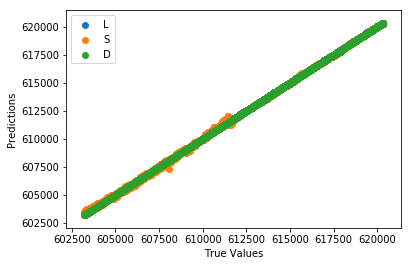

In [15]:
lreg_15min,lreg_scores_15min = Linear_Regression(X_15min,y_15min)
svr_15min,svr_scores_15min = SVR_ML(X_15min,y_15min)
dtr_15min,dtr_scores_15min = Decision_Tree_Regression(X_15min,y_15min)

In [16]:
#1 hour step 
# L : Linear Regression
# S : SVR
# D : Decision Tree

Scores Regression Linéaire:
[0.99998256 0.99998258 0.99998502 0.99998484 0.99998495]
Scores SVR:
[0.99583165 0.99673279 0.99684485 0.99629645 0.99693587]
Scores Arbre de Decision:
[0.99999581 0.99999622 0.99998893 0.99999405 0.99999459]


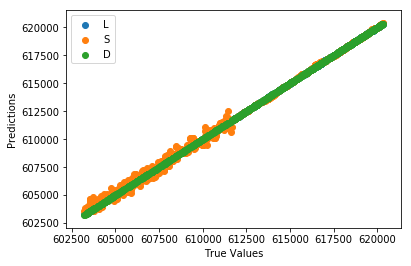

In [17]:
lreg_hour,lreg_scores_hour = Linear_Regression(X_hour,y_hour)
svr_hour,svr_scores_hour = SVR_ML(X_hour,y_hour)
dtr_hour,dtr_scores_hour = Decision_Tree_Regression(X_hour,y_hour)

In [18]:
#6 hours step 
# L : Linear Regression
# S : SVR
# D : Decision Tree

Scores Regression Linéaire:
[0.99998062 0.99997936 0.99998121 0.99998734 0.99997966]
Scores SVR:
[0.94367432 0.93651217 0.97626453 0.94175586 0.93612932]
Scores Arbre de Decision:
[0.99980349 0.99991062 0.99982412 0.99984195 0.99980401]


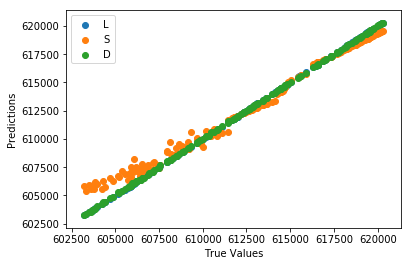

In [19]:
lreg_6_hour,lreg_scores_6_hour = Linear_Regression(X_6_hour,y_6_hour)
svr_6_hour,svr_scores_6_hour = SVR_ML(X_6_hour,y_6_hour)
dtr_6_hour,dtr_scores_6_hour = Decision_Tree_Regression(X_6_hour,y_6_hour)

In [20]:
#1 day step 
# L : Linear Regression
# S : SVR
# D : Decision Tree

Scores Regression Linéaire:
[0.99994694 0.99994441 0.99994433 0.99993915 0.99995521]
Scores SVR:
[0.5023184  0.58048852 0.51553613 0.65128256 0.53908299]
Scores Arbre de Decision:
[0.99629497 0.99761786 0.99835556 0.99859822 0.9993682 ]


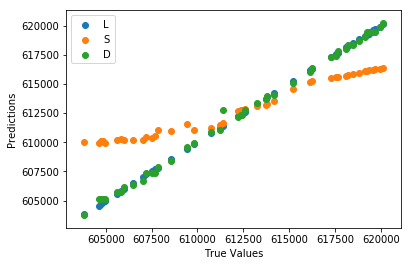

In [21]:
lreg_day,lreg_scores_day = Linear_Regression(X_day,y_day)
svr_day,svr_scores_day = SVR_ML(X_day,y_day)
dtr_day,dtr_scores_day = Decision_Tree_Regression(X_day,y_day)

In [22]:
#1 week step 
# L : Linear Regression
# S : SVR
# D : Decision Tree

Scores Regression Linéaire:
[0.99897228 0.99874829 0.99572513 0.96882303 0.9634243 ]
Scores SVR:
[ 0.12170059  0.11813773  0.108843   -0.14154252  0.17217944]
Scores Arbre de Decision:
[0.97246084 0.85833286 0.76720076 0.54876112 0.89483223]


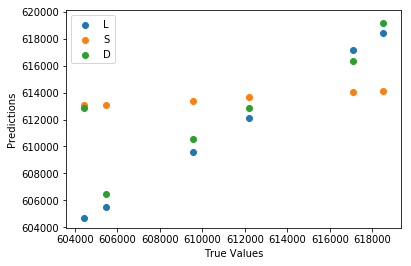

In [23]:
lreg_week,lreg_scores_week = Linear_Regression(X_week,y_week)
svr_week,svr_scores_week = SVR_ML(X_week,y_week)
dtr_week,dtr_scores_week = Decision_Tree_Regression(X_week,y_week)

### Les résultats de validation sont très mauvais car certains points d'Energie active ont énormément dysfonctionné (voir Excel "bug_validation_Energie.xlsx")

In [24]:
print_result_validation_set_par_algo(dtr_15min,"Decision Tree Regression","15 min",X_validation_15min,y_validation_15min)
print_result_validation_set_par_algo(svr_15min,"Support Vector Regression","15 min",X_validation_15min,y_validation_15min)
print_result_validation_set_par_algo(lreg_15min,"Linear Regresion","15 min",X_validation_15min,y_validation_15min)

Coefficient de détermination pour Decision Tree Regression avec un pas de 15 min
-11903.687540493609
Coefficient de détermination pour Support Vector Regression avec un pas de 15 min
-15328.222848811352
Coefficient de détermination pour Linear Regresion avec un pas de 15 min
-17740.79845864446


In [25]:
print_result_validation_set_par_algo(dtr_hour,"Decision Tree Regression","une heure",X_validation_hour,y_validation_hour)
print_result_validation_set_par_algo(svr_hour,"Support Vector Regression","une heure",X_validation_hour,y_validation_hour)
print_result_validation_set_par_algo(lreg_hour,"Linear Regresion","une heure",X_validation_hour,y_validation_hour)

Coefficient de détermination pour Decision Tree Regression avec un pas de une heure
-119774.91112896218
Coefficient de détermination pour Support Vector Regression avec un pas de une heure
-138835.35038521246
Coefficient de détermination pour Linear Regresion avec un pas de une heure
-136357.2806117924


In [26]:
print_result_validation_set_par_algo(dtr_6_hour,"Decision Tree Regression","6 heures",X_validation_6_hour,y_validation_6_hour)
print_result_validation_set_par_algo(svr_6_hour,"Support Vector Regression","6 heures",X_validation_6_hour,y_validation_6_hour)
print_result_validation_set_par_algo(lreg_6_hour,"Linear Regresion","6 heures",X_validation_6_hour,y_validation_6_hour)

Coefficient de détermination pour Decision Tree Regression avec un pas de 6 heures
-10645.649213339908
Coefficient de détermination pour Support Vector Regression avec un pas de 6 heures
-13239.063694926619
Coefficient de détermination pour Linear Regresion avec un pas de 6 heures
-13325.677321024294


In [27]:
print_result_validation_set_par_algo(dtr_day,"Decision Tree Regression","un jour",X_validation_day,y_validation_day)
print_result_validation_set_par_algo(svr_day,"Support Vector Regression","un jour",X_validation_day,y_validation_day)
print_result_validation_set_par_algo(lreg_day,"Linear Regresion","un jour",X_validation_day,y_validation_day)

Coefficient de détermination pour Decision Tree Regression avec un pas de un jour
-168700.79341940084
Coefficient de détermination pour Support Vector Regression avec un pas de un jour
-168221.0607358636
Coefficient de détermination pour Linear Regresion avec un pas de un jour
-174442.26229951458


In [28]:
print_result_validation_set_par_algo(dtr_week,"Decision Tree Regression","un jour",X_validation_week,y_validation_week)
print_result_validation_set_par_algo(svr_week,"Support Vector Regression","un jour",X_validation_week,y_validation_week)
print_result_validation_set_par_algo(lreg_week,"Linear Regresion","un jour",X_validation_week,y_validation_week)

Coefficient de détermination pour Decision Tree Regression avec un pas de un jour
0.0
Coefficient de détermination pour Support Vector Regression avec un pas de un jour
0.0
Coefficient de détermination pour Linear Regresion avec un pas de un jour
0.0
